# Implement Tweet2Vec from Dhingra et al.

Ensure to install graphviz: https://www.graphviz.org/
For, ubuntu install using "sudo apt-get install graphviz"

In [1]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}
!mkdir -p drive
!google-drive-ocamlfuse drive
!ls /content/drive/*

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131183 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.11-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.11-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.11-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [2]:
!ls /content/drive/NLP_bootcamp/Data/tweets.tsv

/content/drive/NLP_bootcamp/Data/tweets.tsv


In [0]:
%matplotlib inline

In [0]:
import numpy as np
np.random.seed(13)

In [5]:
from keras.models import Model
from keras.layers import Dense, Embedding, GRU, Input, Bidirectional
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.regularizers import l2
from keras.utils import np_utils
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [0]:
from IPython.display import SVG
from matplotlib import pyplot as plt
plt.style.use("ggplot")

In [0]:
#tweets.tsv is in the format of <tweet text><tab><hashtag_id> where hashtag_id is a unique id given to each hashtag

tweets = []
labels = []
with open("/content/drive/NLP_bootcamp/Data/tweets.tsv") as f:
    for l in f:
        tweet, label = l.strip().split("\t")
        tweets.append(" ".join(list(tweet)))
        labels.append(int(label))


In [0]:
maxlen = 140

tokenizer = Tokenizer(filters="")
tokenizer.fit_on_texts(tweets)
X_train = tokenizer.texts_to_sequences(tweets)
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
#Y_train = np_utils.to_categorical(labels, len(set(labels)))
Y_train = np_utils.to_categorical(labels, len(set(labels)))
V = len(tokenizer.word_index) + 1

In [9]:
Y_train.shape

(3, 3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(30, 128, input_length=140, embeddings_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(128, return_sequences=False, kernel_regularizer=<keras.reg..., bias_regularizer=<keras.reg..., recurrent_regularizer=<keras.reg...)`
  import sys


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="softmax", kernel_regularizer=<keras.reg...)`
  if __name__ == '__main__':


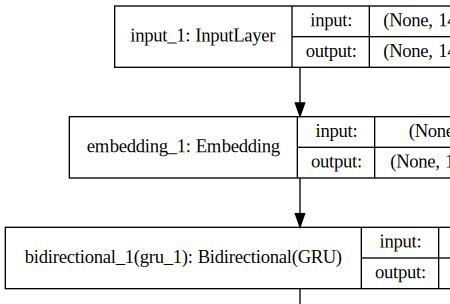

In [10]:
l2_coef = 0.001
tweet = Input(shape=(maxlen,), dtype='int32')
x = Embedding(V, 128, input_length=maxlen, W_regularizer=l2(l=l2_coef))(tweet)
x = Bidirectional(layer=GRU(128, return_sequences=False, 
                            W_regularizer=l2(l=l2_coef),
                            b_regularizer=l2(l=l2_coef),
                            U_regularizer=l2(l=l2_coef)),
                  merge_mode='sum')(x)
x = Dense(len(set(labels)), W_regularizer=l2(l=l2_coef), activation="softmax")(x)

tweet2vec = Model(inputs=tweet, outputs=x)

tweet2vec.compile(loss='categorical_crossentropy',
                  optimizer='RMSprop',
                  metrics=['accuracy'])

SVG(model_to_dot(tweet2vec, show_shapes=True).create(prog='dot', format='svg'))

In [11]:
tweet2vec.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 2 samples, validate on 1 samples
Epoch 1/10
2/2 [==============================] - 6s 3s/step - loss: 1.7800 - acc: 0.0000e+00 - val_loss: 1.9400 - val_acc: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 1s 340ms/step - loss: 1.5549 - acc: 1.0000 - val_loss: 2.1600 - val_acc: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 1s 319ms/step - loss: 1.4028 - acc: 1.0000 - val_loss: 2.4700 - val_acc: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 1s 326ms/step - loss: 1.2605 - acc: 1.0000 - val_loss: 2.9268 - val_acc: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 1s 327ms/step - loss: 1.1209 - acc: 1.0000 - val_loss: 3.6294 - val_acc: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 1s 334ms/step - loss: 0.9844 - acc: 1.0000 - val_loss: 4.7528 - val_acc: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 1s 368ms